In [68]:
%matplotlib inline 
#%matplotlib notebook
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

# Image Thresholding

In [69]:
os.listdir('simdata')
telemetry_data = pd.read_csv('simdata/robot_log.csv', sep = ';')

In [70]:
telemetry_data.head()

,Path,SteerAngle,Throttle,Brake,Speed,X_Position,Y_Position,Pitch,Yaw,Roll
0,C:\Users\user\workspace\robots\simdata\IMG\rob...,0.0,0.0,1.0,0.0,99.66999,85.58897,0.000238,41.86549,-1.482522e-06
1,C:\Users\user\workspace\robots\simdata\IMG\rob...,0.0,0.0,0.0,0.0,99.66999,85.58897,0.000238,41.86549,-7.237717e-07
2,C:\Users\user\workspace\robots\simdata\IMG\rob...,0.0,0.0,0.0,0.0,99.66999,85.58897,0.000238,41.86549,-1.547087e-07
3,C:\Users\user\workspace\robots\simdata\IMG\rob...,0.0,0.0,0.0,0.0,99.66999,85.58897,0.000239,41.86549,5.014044e-07
4,C:\Users\user\workspace\robots\simdata\IMG\rob...,0.0,0.0,0.0,0.0,99.66999,85.58897,0.000239,41.86549,1.434242e-06


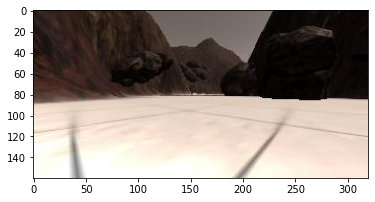

In [71]:
filename = 'test.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

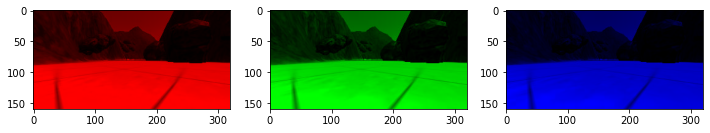

In [72]:
chan = np.copy(image)
### Red Channel (Channel 0)
chan_red = np.copy(image)
chan_red[:,:,[1,2]] = 0

### green Channel (channel 1)
chan_green = np.copy(image)
chan_green[:,:,[0,2]] = 0

### Blue Channel (Channel 2)
chan_blue = np.copy(image)
chan_blue[:,:,[1,0]] = 0

fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(chan_red)
plt.subplot(132)
plt.imshow(chan_green)
plt.subplot(133)
plt.imshow(chan_blue)

In [73]:
def color_threshold(img, rbg_threshold = (0,0,0)):
    """
    Return Binary Image which is thresholded by thr rbg pixel vales 
    given in rbg_threshold i.e. If pixel is > thres assign 1
    and if pixel is < thres assing 0
    args:
          img - img to be thresholded
          rbg_threshold - (r,g,b)
    """
    temp = np.zeros(img.shape)
    rflags_h = img[:,:,0]>rbg_threshold[0]
    gflags_h = img[:,:,1]>rbg_threshold[1]
    bflags_h = img[:,:,2]>rbg_threshold[2]
    
    temp[:,:,0][rflags_h] = 1
    temp[:,:,1][gflags_h] = 1
    temp[:,:,2][bflags_h] = 1
    return temp

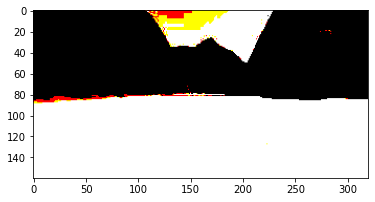

In [74]:
test = color_threshold(chan, rbg_threshold = (100,100,100))
plt.imshow(test)

# Perspective Transform

In [75]:
os.listdir()

['.ipynb_checkpoints',
 'sample_images',
 'simdata',
 'test.jpg',
 'Untitled.ipynb']

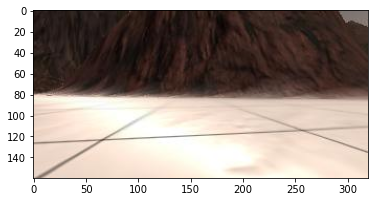

In [76]:
#%matplotlib notebook
#%matplotlib notebook
grid_sample1 = plt.imread('sample_images/robot_sample1.jpg')
plt.imshow(grid_sample1)
plt.show()

In [89]:
img = np.copy(grid_sample1)
offset = 10
dst_size = 20

In [90]:
s

(160, 320, 3)

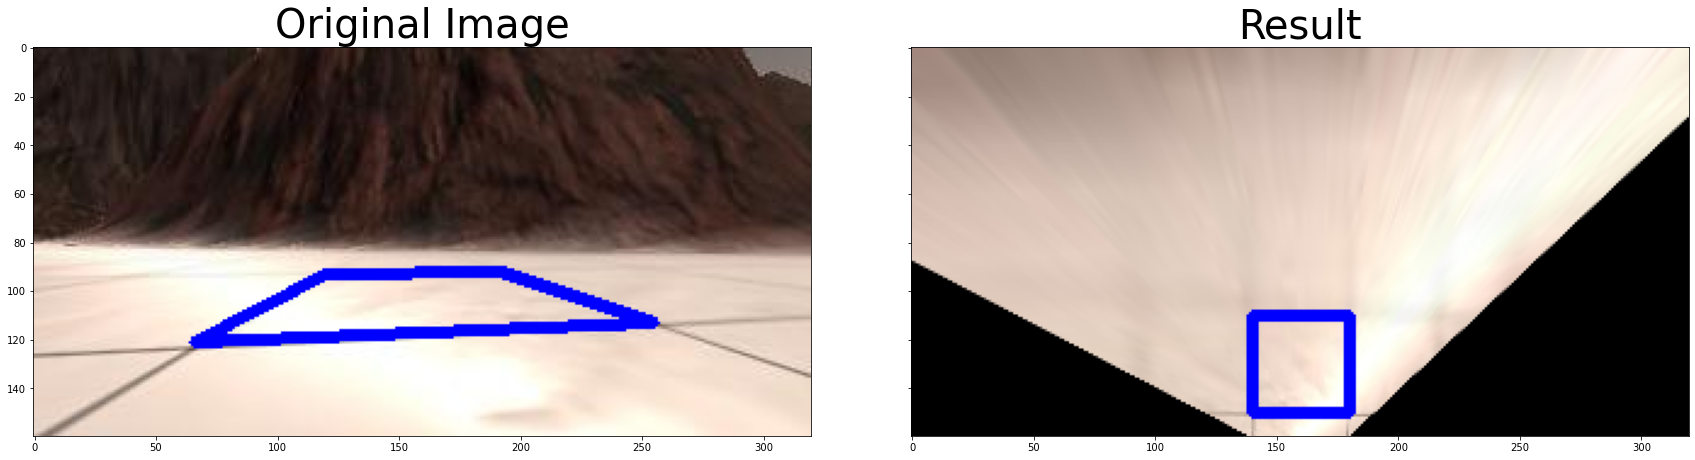

In [106]:
def perspective_transform(img, src, dst):
    M = cv2.getPerspectiveTransform(src,dst)
    warp = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return warp 
### SOUCRE POINTS Reference points from Original Image
ref_points = np.float32([ [192.114,92.2649], [120.284, 93.013], [66.5331,121.781], [255.78,113.178]])
### Where do i want then to be (Destination points)
s =img.shape
img = np.copy(grid_sample1)
dst = np.float32([[s[1]/2-dst_size, s[0] - offset- (2*dst_size)],
                  [s[1]/2+dst_size, s[0] - offset- (2*dst_size)],
                  [s[1]/2+dst_size, s[0] - offset ],
                  [s[1]/2-dst_size, s[0] - offset ]]
                )
warped = perspective_transform(img, ref_points,dst)
cv2.polylines(img, np.int32([ref_points]), True, (0,0,255), 3 )
cv2.polylines(warped, np.int32([dst]), True, (0,0,255), 3 )
f, (ax1,ax2) = plt.subplots(1,2, figsize=(24,6), sharey =True)
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize =40)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize =40)
plt.subplots_adjust(left=0.0, right =1, top=0.9, bottom =0.0)
plt.show()

In [101]:
dst = np.float32([[s[1]/2-dst_size, s[0] - offset - (2*dst_size)],
                  [s[1]/2+dst_size, s[0] - offset - (2*dst_size)],
                  [s[1]/2+dst_size, s[0] - offset ],
                  [s[1]/2-dst_size, s[0] - offset ]])

In [103]:
dst

array([[140., 110.],
       [180., 110.],
       [180., 150.],
       [140., 150.]], dtype=float32)

# (H, W, D)

NameError: name 'img' is not defined

In [195]:
np.random.randint(1,5)

1